### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [159]:
import pandas as pd

# 데이터를 읽어옵니다.
path = "./datasets/customer_invoice_data.csv"
ci_df = pd.read_csv(path)
display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [160]:
# info()를 통해 데이터를 확인해봅니다.
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 중복 행 검사

In [161]:
ci_df.duplicated().sum()

5268

In [162]:
# 중복 행을 삭제합니다.
ci_df = ci_df.drop_duplicates().reset_index(drop=True)
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### 결측치 검사

In [163]:
ci_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [164]:
ci_df['CustomerID'].value_counts()

CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: count, Length: 4372, dtype: int64

In [165]:
# CustomerID가 null인 행 삭제
ci_df = ci_df[~ci_df['CustomerID'].isna()].reset_index(drop=True)
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [166]:
# Description(상품 정보)은 StockCode가 있으므로 RFM Score와 직접적인 관련이 없다.
ci_df.drop(columns=['Description'], axis=1, inplace=True)
ci_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
401599,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
401600,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
401601,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
401602,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [167]:
ci_df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 이상치(Outlier) 검사

In [168]:
# Quantity에 대한 이상치 검사
ci_df[ci_df['Quantity'] <= 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
401159,C581490,23144,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
401243,C581499,M,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
401410,C581568,21258,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
401411,C581569,84978,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [169]:
# 추후 RFM 계산 시 '구매'한 데이터에 초점을 맞출 것이므로, 환불/취소인 음수 데이터 삭제
ci_df = ci_df[ci_df['Quantity'] > 0].reset_index(drop=True)
ci_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
392727,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
392728,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
392729,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
392730,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [170]:
# UnitPrice에 대한 이상치 검사
ci_df[ci_df['UnitPrice'] <= 0]['UnitPrice'].value_counts()

UnitPrice
0.0    40
Name: count, dtype: int64

In [171]:
# describe()를 통해 4분위값 분포 확인
ci_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00


In [172]:
# 각 가격의 평균과의 차이를 절댓값으로 합하여 평균을 구한 값
(ci_df['UnitPrice'] - ci_df.describe().T.loc['UnitPrice', 'mean']).abs().mean()

2.388600620511694

In [173]:
# 각 가격의 중앙값과의 차이를 절댓값으로 합하여 평균을 구한 값
(ci_df['UnitPrice'] - ci_df.describe().T.loc['UnitPrice', '50%']).abs().mean()

2.0729049224407476

In [174]:
# UnitPrice가 0인 행의 StockCode를 가져와 해당 StockCode에 맞는 상품의 UnitPrice 값들의 중앙값(median)으로 변경
false_codes_and_medians = []
for stock_code in ci_df[ci_df['UnitPrice'] == 0]['StockCode']:
    median = ci_df.loc[ci_df['StockCode'] == stock_code, 'UnitPrice'].median()
    false_codes_and_medians.append((stock_code, median))
for code, median in false_codes_and_medians:
    ci_df.loc[(ci_df['StockCode'] == code) & (ci_df['UnitPrice'] == 0), 'UnitPrice'] = median
ci_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
392727,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
392728,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
392729,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
392730,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


### RFM Score 계산을 위한 데이터 전처리
- InvoiceNo 컬럼 삭제
- InvoiceDate를 가장 최근 날짜를 기준으로 차감하여 Recency 계산
- CustomerID의 dtype을 int32로 변환
- CustomerID 별 Quantity의 합을 구하여 Frequency로 변환
- 각 UnitPrice 및 Quantity를 곱한 값, 즉 주문별 총액을 합하여 CustomerID별로 묶어 Monetary로 변환

#### 1) InvoiceNo 컬럼 삭제

In [175]:
# InvoiceNo 컬럼 삭제
ci_df = ci_df.drop(columns=['InvoiceNo'], axis=1)
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
392727,22613,12,12/9/2011 12:50,0.85,12680.0,France
392728,22899,6,12/9/2011 12:50,2.10,12680.0,France
392729,23254,4,12/9/2011 12:50,4.15,12680.0,France
392730,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 2) InvoiceDate를 가장 최근 날짜를 기준으로 차감하여 Recency 계산

In [176]:
# InvoiceDate를 Datetime으로 변환
ci_df['InvoiceDate'] = pd.to_datetime(ci_df['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.date
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,2010-12-01,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
392727,22613,12,2011-12-09,0.85,12680.0,France
392728,22899,6,2011-12-09,2.10,12680.0,France
392729,23254,4,2011-12-09,4.15,12680.0,France
392730,23255,4,2011-12-09,4.15,12680.0,France


In [177]:
# 가장 최근 날짜를 기준으로 차이를 구하여 Recency 컬럼을 만들고 저장
recent_date = ci_df['InvoiceDate'].max()
ci_df['Recency'] = (pd.to_datetime(recent_date) - pd.to_datetime(ci_df['InvoiceDate'], format="%Y-%m-%d")).dt.days
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,373
1,71053,6,2010-12-01,3.39,17850.0,United Kingdom,373
2,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,373
3,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,373
4,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,373
...,...,...,...,...,...,...,...
392727,22613,12,2011-12-09,0.85,12680.0,France,0
392728,22899,6,2011-12-09,2.10,12680.0,France,0
392729,23254,4,2011-12-09,4.15,12680.0,France,0
392730,23255,4,2011-12-09,4.15,12680.0,France,0


#### 3) CustomerID의 dtype을 int32로 변환

In [178]:
ci_df[ci_df['CustomerID'] * 10 % 10 != 0].sum()

StockCode        0
Quantity         0
InvoiceDate      0
UnitPrice      0.0
CustomerID     0.0
Country          0
Recency          0
dtype: object

In [179]:
import numpy as np

ci_df['CustomerID'] = ci_df['CustomerID'].astype(np.int32)
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,373
1,71053,6,2010-12-01,3.39,17850,United Kingdom,373
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,373
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,373
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,373
...,...,...,...,...,...,...,...
392727,22613,12,2011-12-09,0.85,12680,France,0
392728,22899,6,2011-12-09,2.10,12680,France,0
392729,23254,4,2011-12-09,4.15,12680,France,0
392730,23255,4,2011-12-09,4.15,12680,France,0


#### 4) CustomerID 별 Quantity 값의 합을 구하여 Frequency 컬럼을 만들고 저장

In [180]:
# CustomerID 별 Quantity 값의 합
rfm_f = ci_df.groupby('CustomerID')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'Frequency'})
ci_df = pd.merge(ci_df, rfm_f, on="CustomerID")
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,373,1733
1,71053,6,2010-12-01,3.39,17850,United Kingdom,373,1733
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,373,1733
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,373,1733
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,373,1733
...,...,...,...,...,...,...,...,...
392727,22993,12,2011-12-09,1.25,12713,Germany,0,508
392728,22907,12,2011-12-09,0.85,12713,Germany,0,508
392729,22908,12,2011-12-09,0.85,12713,Germany,0,508
392730,23215,12,2011-12-09,2.08,12713,Germany,0,508


#### 5) CustomerID 별 UnitPrice 값과 Quantity를 곱한 값, 즉 주문별 총액을 모두 합하여 Monetary 컬럼을 만들고 저장

In [181]:
# CustomerID 별 UnitPrice 값과 Quantity를 곱하여 합한 값
rfm_m = ci_df.groupby('CustomerID')[['UnitPrice', 'Quantity']].apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum())
rfm_m.name = 'Monetary'
ci_df = pd.merge(ci_df, rfm_m, on="CustomerID")
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,373,1733,5391.21
1,71053,6,2010-12-01,3.39,17850,United Kingdom,373,1733,5391.21
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,373,1733,5391.21
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,373,1733,5391.21
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,373,1733,5391.21
...,...,...,...,...,...,...,...,...,...
392727,22993,12,2011-12-09,1.25,12713,Germany,0,508,848.55
392728,22907,12,2011-12-09,0.85,12713,Germany,0,508,848.55
392729,22908,12,2011-12-09,0.85,12713,Germany,0,508,848.55
392730,23215,12,2011-12-09,2.08,12713,Germany,0,508,848.55


### RFM Score 계산하기
- Recency, Frequency, Monetary를 CustomerID 별로 그룹화하여 별도의 df에 저장

In [182]:
# Recency, Frequency, Monetary로 구성된 DataFrame 생성
recency = ci_df.groupby('CustomerID')['Recency'].min()
frequency = ci_df.groupby('CustomerID')['Frequency'].max()
monetary = ci_df.groupby('CustomerID')['Monetary'].max()

ci_rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

ci_rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,74215,77183.60
12347,2,2458,4310.00
12348,75,2341,1797.24
12349,18,631,1757.55
12350,310,197,334.40
...,...,...,...
18280,277,45,180.60
18281,180,54,80.82
18282,7,103,178.05


- 정규화(Normalization) 진행

In [183]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(ci_rfm_df)

In [184]:
ci_rfm_df = pd.DataFrame(rfm_normalization, columns=ci_rfm_df.columns, index=ci_rfm_df.index)
ci_rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,0.871314,0.375786,0.274678
12347,0.005362,0.012441,0.015326
12348,0.201072,0.011849,0.006383
12349,0.048257,0.003190,0.006242
12350,0.831099,0.000992,0.001177
...,...,...,...
18280,0.742627,0.000223,0.000629
18281,0.482574,0.000268,0.000274
18282,0.018767,0.000516,0.000620


In [185]:
# Recency 수치가 반대로 되어있으므로 1에서 뺀 값으로 바꿔준다.
ci_rfm_df['Recency'] = 1 - ci_rfm_df['Recency']
ci_rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,0.128686,0.375786,0.274678
12347,0.994638,0.012441,0.015326
12348,0.798928,0.011849,0.006383
12349,0.951743,0.003190,0.006242
12350,0.168901,0.000992,0.001177
...,...,...,...
18280,0.257373,0.000223,0.000629
18281,0.517426,0.000268,0.000274
18282,0.981233,0.000516,0.000620


In [186]:
# 이제 원본 데이터프레임(ci_df)에 'TotalScore'라는 이름의 컬럼을 만들고 RFM Score를 저장
ci_rfm_df['TotalScore'] = ci_rfm_df['Recency'] + ci_rfm_df['Frequency'] + ci_rfm_df['Monetary']
ci_rfm_df = ci_rfm_df.drop(labels=['Recency', 'Frequency', 'Monetary'], axis=1)
ci_df = pd.merge(ci_df, ci_rfm_df, on="CustomerID")
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,TotalScore
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,373,1733,5391.21,0.030625
1,71053,6,2010-12-01,3.39,17850,United Kingdom,373,1733,5391.21,0.030625
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,373,1733,5391.21,0.030625
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,373,1733,5391.21,0.030625
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,373,1733,5391.21,0.030625
...,...,...,...,...,...,...,...,...,...,...
392727,22993,12,2011-12-09,1.25,12713,Germany,0,508,848.55,1.005574
392728,22907,12,2011-12-09,0.85,12713,Germany,0,508,848.55,1.005574
392729,22908,12,2011-12-09,0.85,12713,Germany,0,508,848.55,1.005574
392730,23215,12,2011-12-09,2.08,12713,Germany,0,508,848.55,1.005574


In [187]:
# ci_df에서 Recency, Frequency, Monetary 컬럼 drop 하기
ci_df.drop(columns=['Recency', 'Frequency', 'Monetary'], axis=1, inplace=True)
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalScore
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,0.030625
1,71053,6,2010-12-01,3.39,17850,United Kingdom,0.030625
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,0.030625
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,0.030625
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,0.030625
...,...,...,...,...,...,...,...
392727,22993,12,2011-12-09,1.25,12713,Germany,1.005574
392728,22907,12,2011-12-09,0.85,12713,Germany,1.005574
392729,22908,12,2011-12-09,0.85,12713,Germany,1.005574
392730,23215,12,2011-12-09,2.08,12713,Germany,1.005574


#### RFM Score를 기준으로 CustomerID별 등급 나누기

In [188]:
import numpy as np

l1, l2, l3, l4 = np.percentile(ci_df['TotalScore'], [25, 55, 77, 92])
print(l1, l2, l3, l4)

0.8982014877442862 0.989852062003228 1.0246224618081128 1.2571292408547485


In [189]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [190]:
ci_df['Level'] = ci_df['TotalScore'].apply(get_level)
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalScore,Level
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,0.030625,5
1,71053,6,2010-12-01,3.39,17850,United Kingdom,0.030625,5
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,0.030625,5
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,0.030625,5
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,0.030625,5
...,...,...,...,...,...,...,...,...
392727,22993,12,2011-12-09,1.25,12713,Germany,1.005574,3
392728,22907,12,2011-12-09,0.85,12713,Germany,1.005574,3
392729,22908,12,2011-12-09,0.85,12713,Germany,1.005574,3
392730,23215,12,2011-12-09,2.08,12713,Germany,1.005574,3


In [191]:
order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
ci_df['Level'] = ci_df['Level'].replace([5, 4, 3, 2, 1], order)
ci_df

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalScore,Level
0,85123A,6,2010-12-01,2.55,17850,United Kingdom,0.030625,Bronze
1,71053,6,2010-12-01,3.39,17850,United Kingdom,0.030625,Bronze
2,84406B,8,2010-12-01,2.75,17850,United Kingdom,0.030625,Bronze
3,84029G,6,2010-12-01,3.39,17850,United Kingdom,0.030625,Bronze
4,84029E,6,2010-12-01,3.39,17850,United Kingdom,0.030625,Bronze
...,...,...,...,...,...,...,...,...
392727,22993,12,2011-12-09,1.25,12713,Germany,1.005574,Gold
392728,22907,12,2011-12-09,0.85,12713,Germany,1.005574,Gold
392729,22908,12,2011-12-09,0.85,12713,Germany,1.005574,Gold
392730,23215,12,2011-12-09,2.08,12713,Germany,1.005574,Gold


In [192]:
print(ci_df['Level'].value_counts())

Level
Silver     117822
Bronze      98250
Gold        86440
Diamond     65809
VIP         24411
Name: count, dtype: int64


#### 등급별 고객 수 시각화하기

<Axes: xlabel='Level', ylabel='count'>

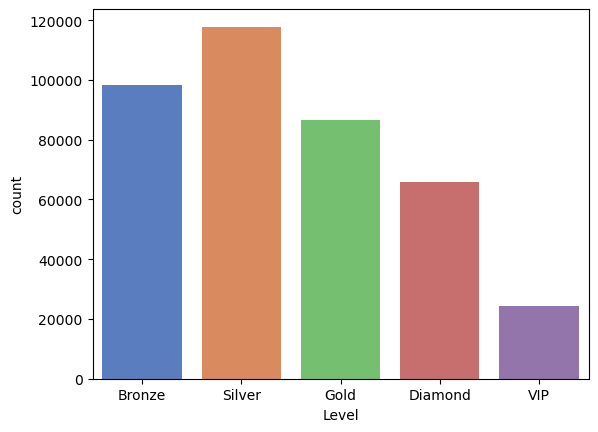

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.countplot(x='Level', data=ci_df, palette='muted', order=order)

#### 국가(Country)별 고객 등급 분포 시각화

In [194]:
ci_df['Country'].value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


- 데이터가 영국(United Kingdom)에 집중되어 있으므로, 1~3위인 영국, 독일, 프랑스와 나머지 국가들로 그래프를 구성하여 시각화
- 나머지 국가들(Others)은 총합을 기준으로 시각화

In [195]:
a = ci_df[~ci_df['Country'].isin(['United Kingdom', 'Germany', 'France'])]
a.groupby('Level').size()

Level
Bronze      6569
Diamond     1759
Gold        2291
Silver      5471
VIP        10061
dtype: int64

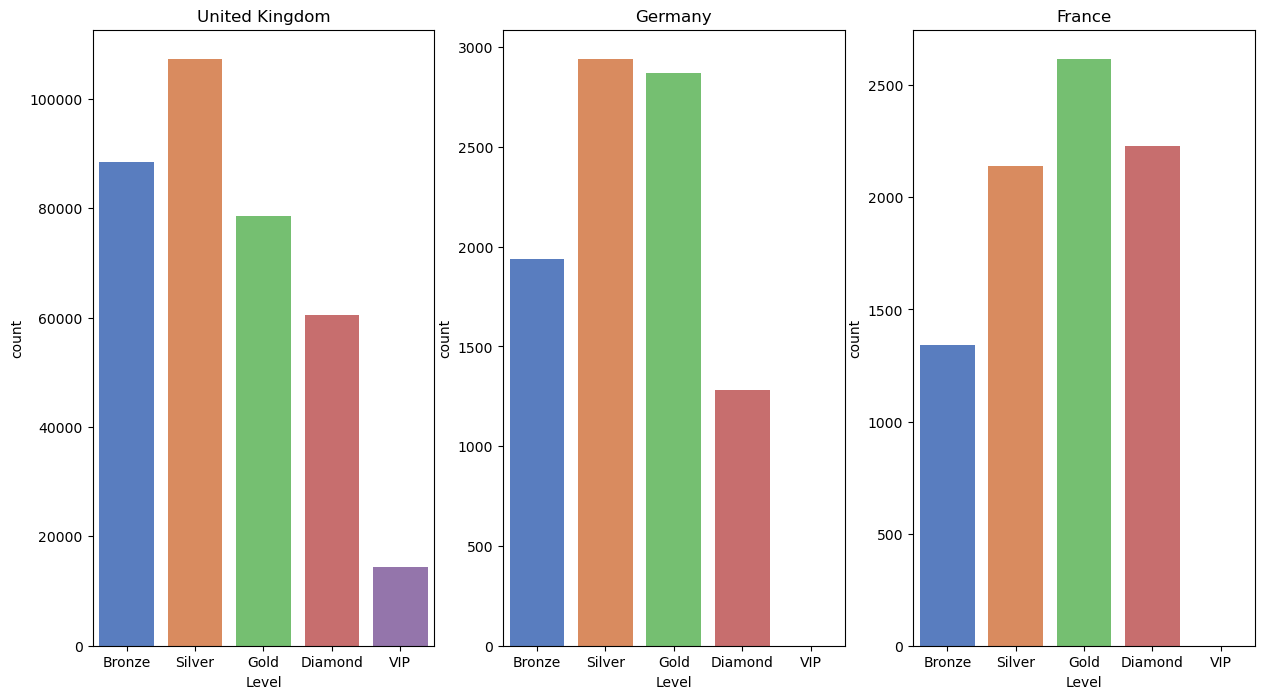

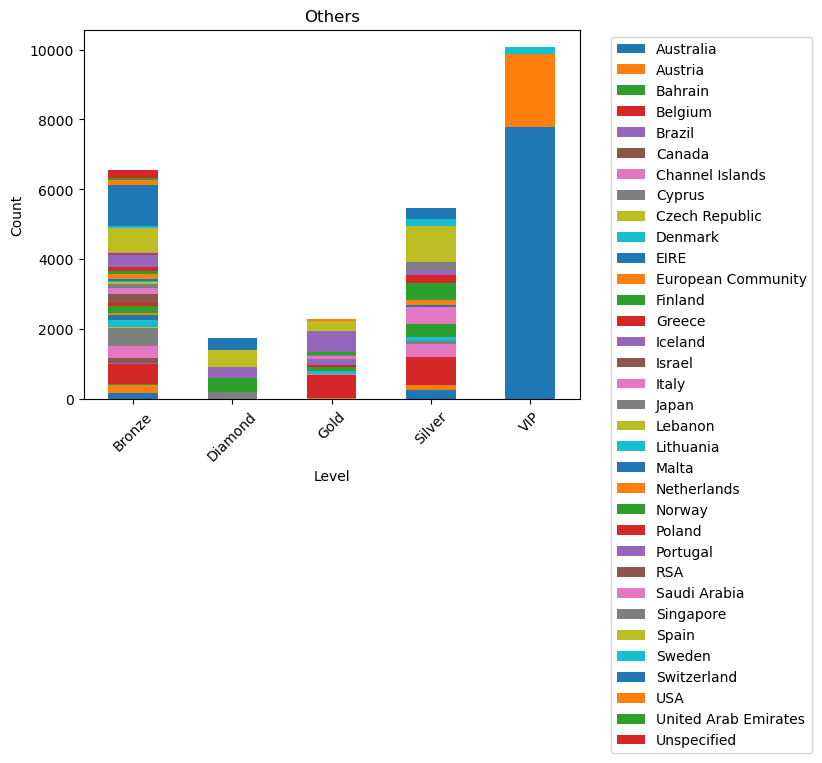

In [196]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
# 영국
sns.countplot(ax=axes[0], x='Level', data=ci_df[ci_df['Country'] == 'United Kingdom'], palette='muted', order=order)
axes[0].set_title('United Kingdom')

# 독일
sns.countplot(ax=axes[1], x='Level', data=ci_df[ci_df['Country'] == 'Germany'], palette='muted', order=order)
axes[1].set_title('Germany')

# 프랑스
sns.countplot(ax=axes[2], x='Level', data=ci_df[ci_df['Country'] == 'France'], palette='muted', order=order)
axes[2].set_title('France')

plt.show()
# 기타 국가들
etc_countries_df = ci_df[~ci_df['Country'].isin(['United Kingdom', 'Germany', 'France'])]
country_level_counts = etc_countries_df.groupby(['Country', 'Level']).size().reset_index(name='Count')

pivot_df = country_level_counts.pivot(index='Level', columns='Country', values='Count')

# 누적 막대 그래프 그리기
pivot_df.plot(kind='bar', stacked=True)

# 그래프 제목 및 축 이름 설정
plt.title('Others')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 범례 위치 설정
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

# 그래프 출력
plt.show()


#### 호주와 네덜란드의 데이터를 좀 더 살펴보겠습니다.

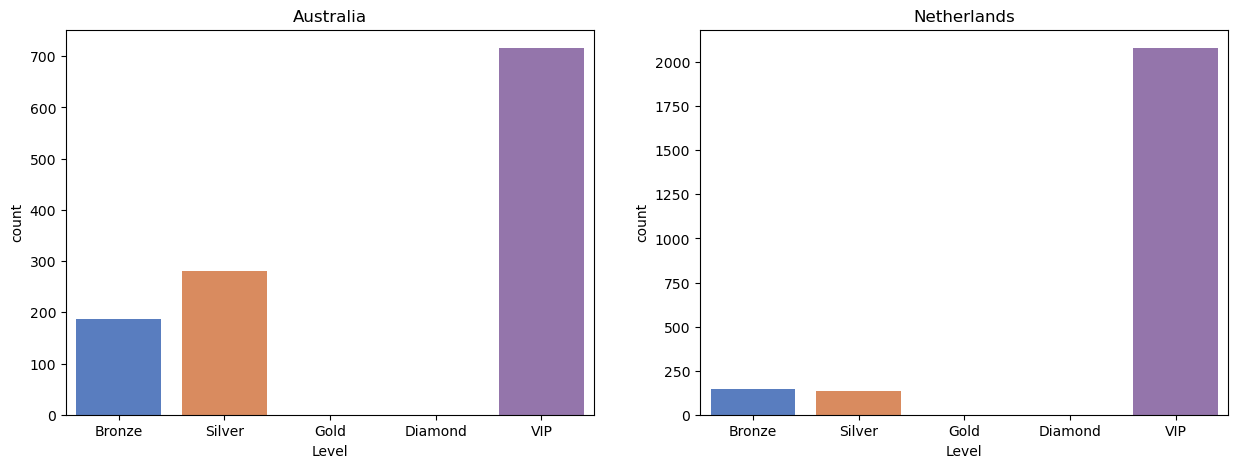

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
# 호주
sns.countplot(ax=axes[0], x='Level', data=ci_df[ci_df['Country'] == 'Australia'], palette='muted', order=order)
axes[0].set_title('Australia')

# 네덜란드
sns.countplot(ax=axes[1], x='Level', data=ci_df[ci_df['Country'] == 'Netherlands'], palette='muted', order=order)
axes[1].set_title('Netherlands')

plt.show()

### 주문 데이터 분석
- 고객의 ID(CustomerID)가 존재하는 데이터를 대상으로, CustomerID 별로 데이터를 묶어 집계한 후 RFM 점수를 구하였다.
  
- 주문 날짜(InvoiceDate) 컬럼의 데이터를 가장 최근 날짜를 기준으로 차이를 구하여 Recency를 계산하였다.
- 고객 ID(CustomerID) 별 주문 수량(Quantity)의 합을 구하여 Frequency를 계산하였다.
- 고객 ID(CustomerID) 별 주문 총액(상품별 가격 * 주문 수량)의 합을 구하여 Monetary를 계산하였다.

- 이 때, Recency, Frequency, Monetary 값을 0~1 사이의 값으로 정규화하여 각 값을 더한 RFM 점수를 TotalScore 컬럼에 저장했다.

- TotalScore 값을 바탕으로 고객 데이터를 'Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'의 5개 등급(그룹)으로 분류하였다.

- 국가(Country)별로 각 등급에 속하는 고객 데이터의 분포를 시각화한 결과, 고객 데이터가 영국에 집중되어 있으며  
  다른 국가와의 차이가 매우 크게 나타남을 확인하였다.  
  따라서 고객 데이터의 수가 많은 순으로 1~3위에 해당하는 영국, 독일, 프랑스의 등급별 고객 데이터 분포를  
  별도의 그래프로 시각화하였으며, 나머지 국가들은 'Others'로 묶어 총합을 기준으로 시각화하였다.

- 영국의 경우 등급에 따른 전체 고객 분포 양상과 유사한 형태의 분포를 보였으나,    
  독일과 프랑스의 경우 VIP 등급에 해당하는 고객 데이터가 존재하지 않았다.  
  이는 주어진 데이터셋을 기준으로 보았을 때 독일과 프랑스의 고객들이 영국의 고객들에 비해  
  상대적으로 덜 활동적인 구매 동향을 보인다는 점을 시사한다.   
  특히 독일의 경우 Silver 및 Gold 등급에 속하는 고객에 비해 Diamond 등급에 속하는 고객의 비율이 다른 국가에 비해  
  현저히 낮은 경향을 보였다.

- 위 세 국가를 제외한 기타 국가의 고객 데이터 분포를 시각화한 결과,   
  호주와 네덜란드의 VIP 등급 고객 데이터의 비율이 매우 높게 나타나 별도의 그래프로 시각화하였다.  

- 호주와 네덜란드의 경우 Gold 또는 Diamond 등급 고객 데이터가 존재하지 않았지만 VIP 등급 고객 데이터 수가 높게 나타났다.  
  이는 경제적으로 안정된 지역의 고객들이 더 높은 등급에 속할 가능성이 있다는 점에서 미루어 볼 때,  
  호주와 네덜란드의 경제적 상황과 소비자들의 구매력에서 기인한 결과로 예상된다.
  

#### 마케팅 전략 제안
> VIP 등급에 속하는 고객의 비율이 낮거나 존재하지 않는 독일, 프랑스와 같은 국가에서는 고객들을 대상으로 보다 높은 가치의 새로운 제품을 출시하거나 기존 제품 및 브랜드의 가치에 대한 인식을 제고하기 위한 캠페인을 진행하는 것이 효과적일 수 있습니다. 또한 Diamond 등급 고객의 비율이 비교적 높지 않은 독일의 고객들을 대상으로 맞춤형 프로모션 및 할인을 제공하거나 이전 구매 제품에 대한 리뷰 및 평가를 유도함으로써, 제품 재구매율(Frequency)을 높이고 브랜드에 대한 신뢰와 만족도를 높일 수 있습니다.  
> 특히 VIP 등급 고객의 비율은 높지만 Bronze나 Silver 등급 고객에 비해 Gold와 Diamond 등급 고객의 비율이 낮은 호주, 네덜란드 등의 국가에서는 전체 고객층을 타겟할 수 있도록 다양한 수요층을 고려한 전략이 효과적일 수 있습니다. 예를 들어 제품 라인업에 새로운 제품을 추가하거나 기존 제품을 업그레이드함으로써 폭넓은 수요에 대응할 수 있으며, 동시에 VIP 등급 고객들에게 특별한 혜택을 제공함으로써 기존 VIP 고객들의 수요를 유지하는 방향이 도움이 될 수 있습니다.

## 피드백: 등급별 전략을 제안할 목적이라면 차라리 항목을 등급별로 나누어 각 등급에 맞는 전략을 제안할 것!